# Data Description

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

# Import Required Library

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing dataset from github

df_train=pd.read_csv("train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [5]:
df_test=pd.read_csv("test.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


We have pulled the dataset from the csv and will work on this dataset

In [8]:
print(df_train.shape)
print(df_test.shape)

(1168, 81)
(292, 80)


We have a 1168 rows and 81 columns in the dataset in train data and 292 rows and 80 columns in the test dataset. Also, have a some null value in the dataset.

In [10]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [12]:
df_test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

Sales price is the Output - We have a lot of columns so let check mean, SD for Sales price

In [29]:
#Removing the null values
nulls = pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1161
MiscFeature,1124
Alley,1091
Fence,931
FireplaceQu,551
LotFrontage,214
GarageYrBlt,64
GarageCond,64
GarageType,64


In [72]:
#Removing the null values
nulls = pd.DataFrame(df_test.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,292
MiscFeature,282
Alley,278
Fence,248
FireplaceQu,139
LotFrontage,45
GarageQual,17
GarageCond,17
GarageFinish,17


In [14]:
df_train['SalePrice'].describe()

count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Sales price is right skewed. So, we perform log transformation so that the skewness is nearly zero

Skew is: 1.953877705368286


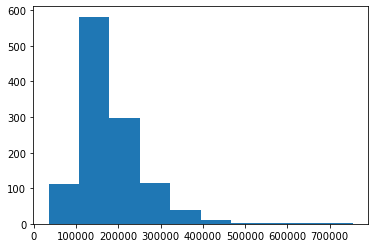

Skew is: 0.07360997199445295


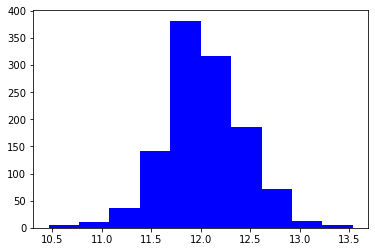

In [15]:
# Determining the Skewness of data 
print ("Skew is:", df_train.SalePrice.skew())

plt.hist(df_train.SalePrice)
plt.show()

# After log transformation of the data it looks much more center aligned
df_train['Skewed_SP'] = np.log(df_train['SalePrice']+1)
print ("Skew is:", df_train['Skewed_SP'].skew())
plt.hist(df_train['Skewed_SP'], color='blue')
plt.show()

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64

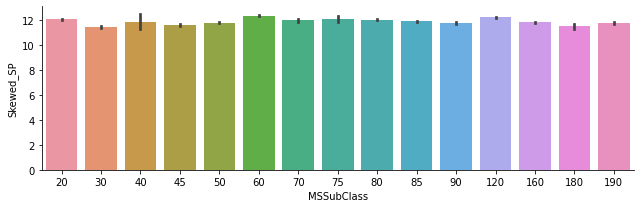

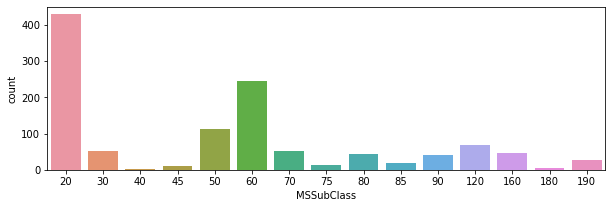

In [16]:
sns.factorplot('MSSubClass', 'Skewed_SP', data=df_train,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot('MSSubClass', data=df_train)
df_train['MSSubClass'].value_counts()

MSSubClass = 60 has highest SalePrice while the sales of houses with MSSubClass = 20 is the highest

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

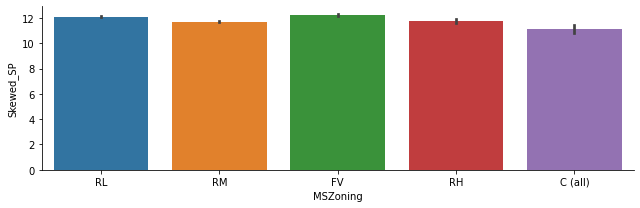

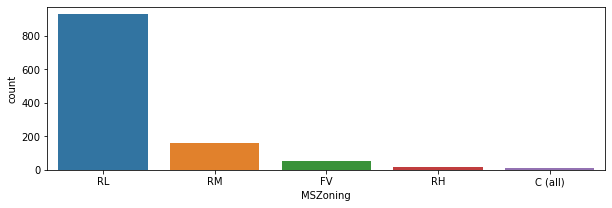

In [17]:
sns.factorplot('MSZoning', 'Skewed_SP', data=df_train,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot('MSZoning', data=df_train)
df_train['MSZoning'].value_counts()

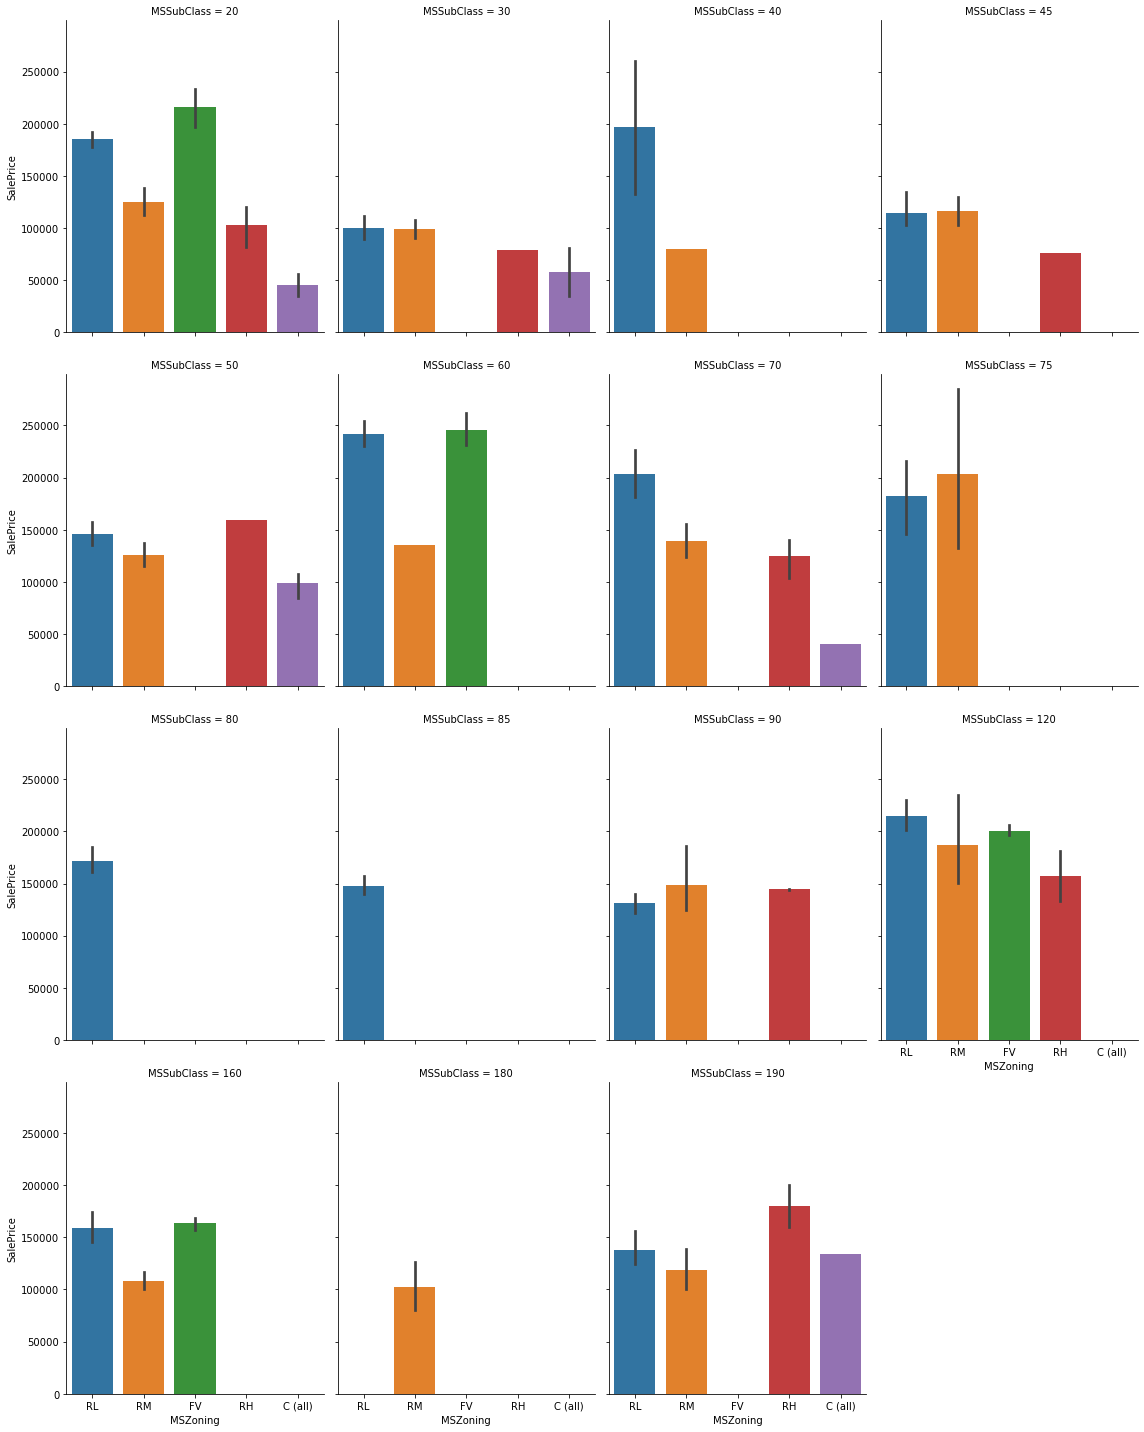

In [18]:
sns.factorplot(x='MSZoning', y='SalePrice', col='MSSubClass', data=df_train, kind='bar', col_wrap=4, aspect=0.8)

In [19]:
numerical_features = df_train.select_dtypes(include=[np.number])
numerical_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
Skewed_SP        float64
dtype: object

In [20]:
# Then we will try to find the corretation between the feature and target
corr = numerical_features.corr()
#print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
#print (corr['SalePrice'].sort_values(ascending=False)[-5:])
print (corr['SalePrice'].sort_values(ascending=False)[:], '\n')

SalePrice        1.000000
Skewed_SP        0.945730
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
GarageYrBlt      0.474346
MasVnrArea       0.466386
Fireplaces       0.459611
BsmtFinSF1       0.362874
LotFrontage      0.341294
OpenPorchSF      0.339500
2ndFlrSF         0.330386
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
BedroomAbvGr     0.158281
PoolArea         0.103280
ScreenPorch      0.100284
MoSold           0.072764
3SsnPorch        0.060119
BsmtFinSF2      -0.010151
BsmtHalfBath    -0.011109
MiscVal         -0.013071
Id              -0.023897
LowQualFinSF    -0.032381
YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr

In [23]:
df_train.OverallQual.unique()
quality_pivot = df_train.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)
quality_pivot

,SalePrice
OverallQual,
1,50150.0
2,60000.0
3,86250.0
4,108959.0
5,133700.0
6,160000.0
7,200120.5
8,268750.0
9,343821.5


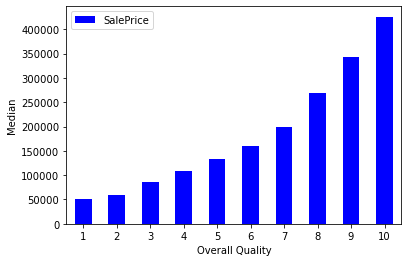

In [24]:
quality_pivot.plot(kind='bar',color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median')
plt.xticks(rotation=0)
plt.show()

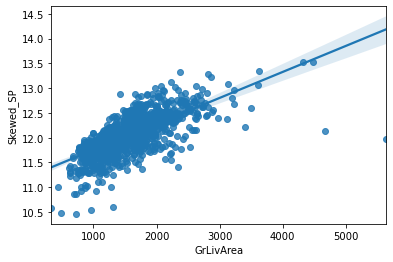

In [25]:
sns.regplot(x='GrLivArea',y='Skewed_SP',data=df_train)

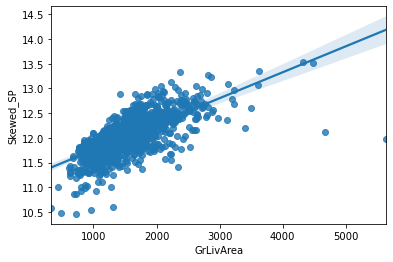

In [26]:
#Removing outliers
train = df_train[df_train['GrLivArea'] < 4000]
sns.regplot(x='GrLivArea',y='Skewed_SP',data=df_train)

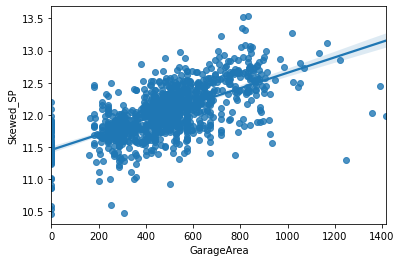

In [27]:
sns.regplot(x='GarageArea',y='Skewed_SP',data=df_train)

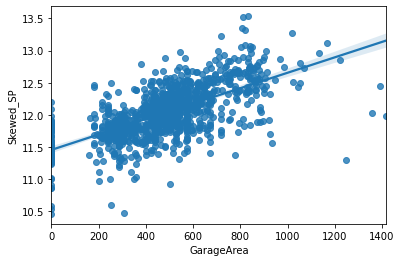

In [28]:
#Removing outliers
train = df_train[df_train['GarageArea'] < 1200]
sns.regplot(x='GarageArea',y='Skewed_SP',data=df_train)

In [30]:
#Analysing the non numeric data 
categoricals = df_train.select_dtypes(exclude=[np.number])
categoricals.describe(include='all')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1168,1168,77,1168,1168,1168,1168,1168,1168,1168,...,1104,1104,1104,1104,1168,7,237,44,1168,1168
unique,5,2,2,4,4,1,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,928,1164,41,740,1046,1168,842,1105,182,1005,...,691,487,1050,1061,1071,3,129,40,999,945


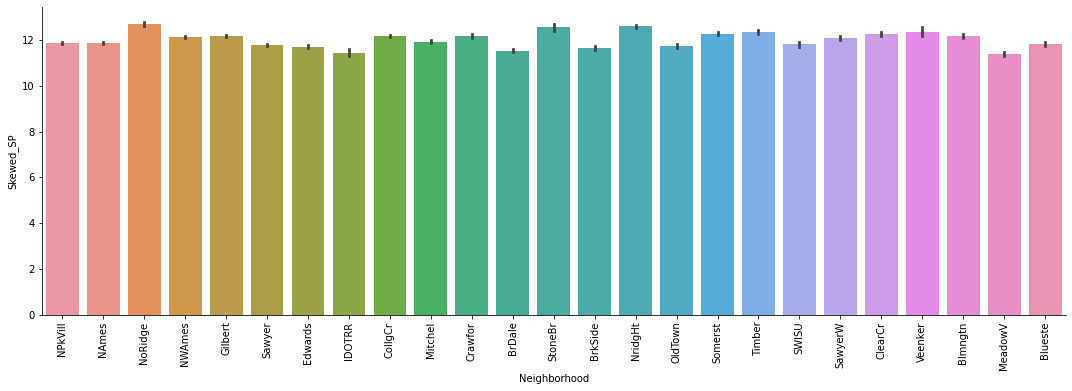

In [31]:
g = sns.factorplot(x='Neighborhood', y='Skewed_SP', data=df_train, kind='bar', aspect=3)
g.set_xticklabels(rotation=90)

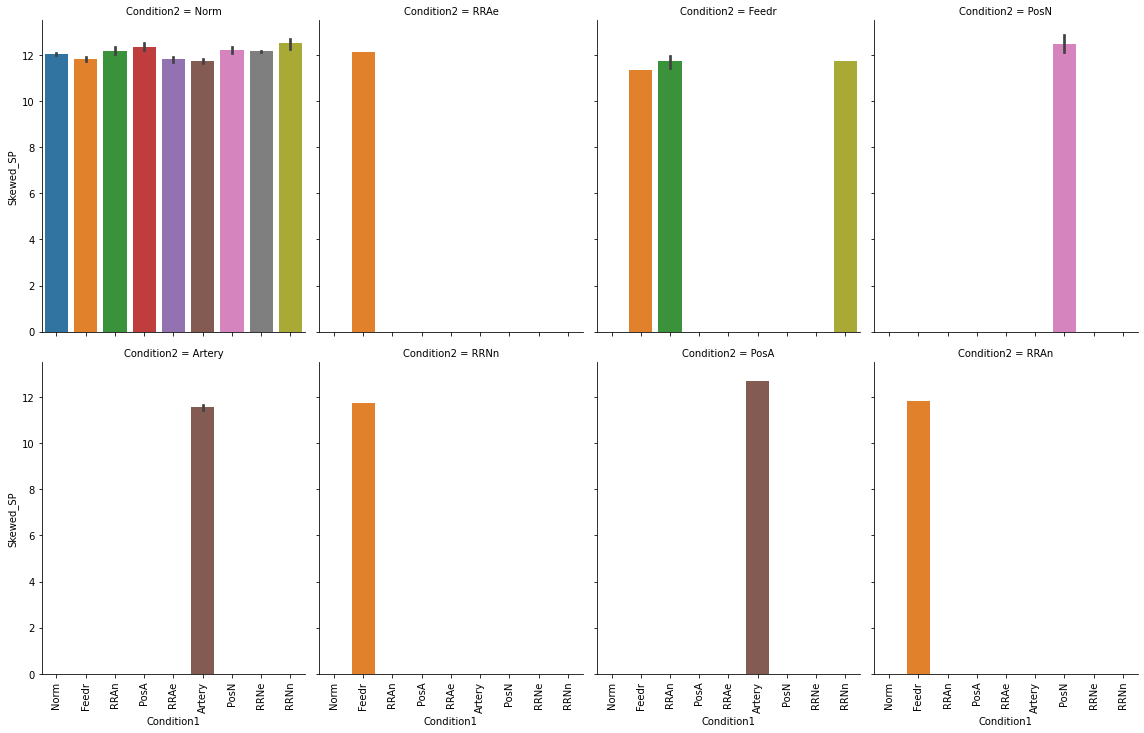

In [32]:
g = sns.factorplot(x='Condition1', y='Skewed_SP', col='Condition2', data=df_train, kind='bar', col_wrap=4, aspect=0.8)
g.set_xticklabels(rotation=90)

In [33]:
#Data Trasformation 
print ("Original: \n") 
print (df_train.Street.value_counts(), "\n")

Original: 

Pave    1164
Grvl       4
Name: Street, dtype: int64 



In [73]:
#Data Trasformation 
print ("Original: \n") 
print (df_test.Street.value_counts(), "\n")

Original: 

Pave    290
Grvl      2
Name: Street, dtype: int64 



In [74]:
# Turn into one hot encoding 
df_train['enc_street'] = pd.get_dummies(df_train.Street, drop_first=True)
df_test['enc_street'] = pd.get_dummies(df_test.Street, drop_first=True)

In [75]:
# Encoded 
print ('Encoded: \n') 
print (df_train.enc_street.value_counts())

Encoded: 

1    1164
0       4
Name: enc_street, dtype: int64


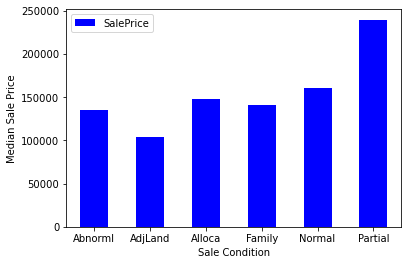

In [36]:
# Feature Engineering
condition_pivot = df_train.pivot_table(index='SaleCondition',values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [37]:
def encode(x): return 1 if x == 'Partial' else 0
df_train['enc_condition'] = df_train.SaleCondition.apply(encode)
df_test['enc_condition'] = df_test.SaleCondition.apply(encode)

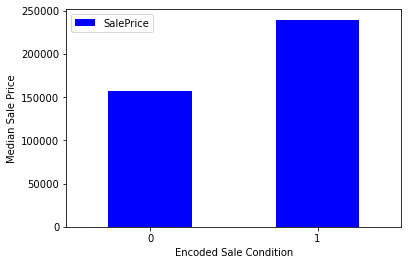

In [38]:
condition_pivot = df_train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [83]:
#Interpolation of data 
data = df_train.select_dtypes(include=[np.number]).interpolate().dropna()
test1 = Test1.select_dtypes(include=[np.number]).interpolate().dropna()

In [40]:
sum(data.isnull().sum() != 0)

0

In [82]:
Test1=df_test.drop(['PoolQC'], axis=1)

In [58]:
# Linear Model for the  train and test
y = np.log(data.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [60]:
from sklearn import linear_model
from sklearn import ensemble

#lr =  ensemble.RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "sqrt", min_samples_leaf = 50)
#lr = linear_model.LinearRegression()
lr = ensemble.GradientBoostingRegressor()
#lr = linear_model.TheilSenRegressor()
#lr = linear_model.RANSACRegressor(random_state=50)
model = lr.fit(X_train, y_train)
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.997489808234991


In [61]:
predictions = model.predict(X_test)

In [62]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.0004206616591390212


Text(0.5, 1.0, 'Linear Regression Model')

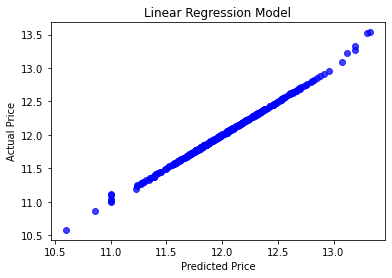

In [63]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
#pltrandom_state=None.show()

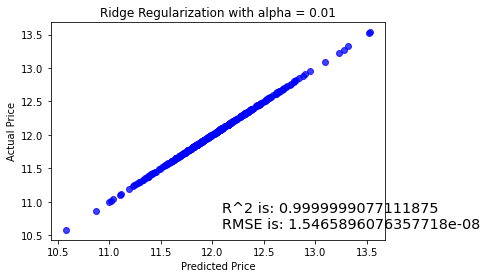

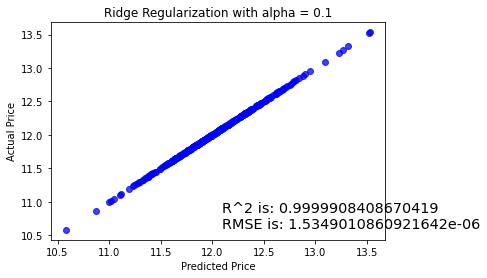

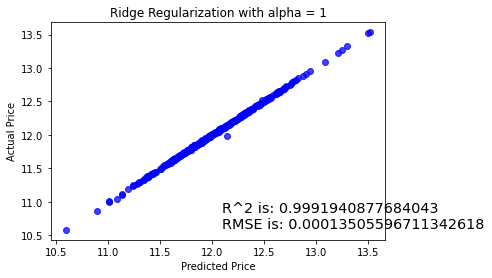

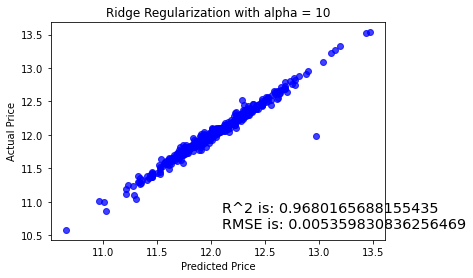

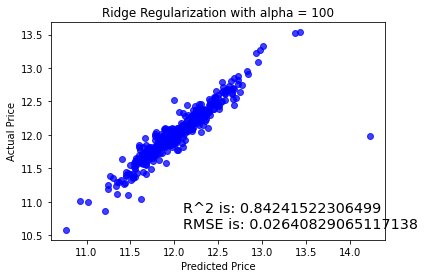

In [64]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [84]:
submission = pd.DataFrame()
submission['Id'] =test1.Id

In [87]:
feats =test1.select_dtypes(include=[np.number]).interpolate()

In [88]:
predictions = model.predict(feats)

In [90]:
final_predictions = np.exp(predictions)

In [91]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [13.22516612 13.22549943 13.22459332 13.22082124 13.22063051] 

Final predictions are: 
 [554136.38599104 554321.11766476 553819.06723651 551733.95482494
 551628.73206263]


In [93]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,337,554136.385991
1,1018,554321.117665
2,929,553819.067237
3,1148,551733.954825
4,1227,551628.732063


In [94]:
submission.to_csv('submission1.csv', index=False)